# Class Exercise - DDM! Due Thursday, November 6th at 11:59 PM

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

We want to simulate trajectories of the drift diffusion model. We know that the model functions as:

$$
dx = \mu dt + \sigma d W_t
$$

where $\mu$ is the drift, $dt$ is our time step, $\sigma$ is the noise magnitude, and $dW_t$ is the noise process (0 mean) that is proportional to $\sqrt(dt)$.

At each time step, we want to evaluate this equation to move $x$ forward by some $dx$. At each time step, to evaluate $d W_t$ as a 0 mean noise process that is proportional to $\sqrt(dt)$, set this as $d W_t = np.sqrt(dt)*np.random.randn()$.

In [ ]:
def dx(mu, dt=0.001, sigma=0.3):
    """
    Returns the SDE value for the drift diffusion model.
    Noise term is proportional to sqrt(dt)

    Parameters
    -----------
    mu : float
        drift rate or bias strength
    dt : float
        (optional) time step
    sigma : float
        (optional) diffusion or noise magnitude

    Returns
    -------
    float
        value of drift diffusion model
    """
    dw = np.sqrt(dt)*np.random.randn()
    return mu*dt + sigma*dw


def ddm_trial(mu, x0=0, dt=0.001, sigma=0.3, boundary=1, t_max=5):
    """
    Simulates one decision trajectory of DDM and one trial results in:
        Result of trajectory as either +/- boundary or a 0 for no success
        Amount of time to reach the result
        Trajectory of path to that result

    Parameters
    -----------
    mu : float
        drift rate or bias strength
    x0 : float
        (optional) initial bias to decision
    dt : float
        (optional) time step
    sigma : float
        (optional) diffusion or noise magnitude
    boundary : float
        (optional) +/- value of boundary decision
    t_max : float
        (optional) max time allowed to decide

    Returns
    -------
    float
        result of trajectory (+/- boundary or 0 for no success)
    float
        decision time of trajectory
    np.ndarray
        trajectory of decision variable x
    """
    steps = int(t_max / dt)
    x = np.zeros(steps)
    x[0] = x0
    for i in range(1, steps):
        x[i] = x[i-1] + dx(mu, dt, sigma)
        if x[i] >= boundary:
          return 1, i*dt, x[0:i]
        elif x[i] <= -boundary:
          return -1, i*dt, x[0:i]
    return 0, t_max, x


Now that you have the functions set up, let's give this a shot! Try $N = 100$ trials with the following parameters:

$$
x_0 = 0 \quad B = \pm 1 \quad \mu = 0.1 \quad \sigma = 0.3 \quad dt=0.001
$$

Only allow for 5 seconds of decision time. Record the average reaction time for positive decisions and negative decisions. What was the accuracy for each of those?

_Hint: The above parameters are already the default for (except for $\mu$) the functions!_

Plot all 100 trajectories, for positive decisions, plot these in blue and negative decisions in red. Others, plot in gray.

You might get something like the following:

![image.png](attachment:image.png)




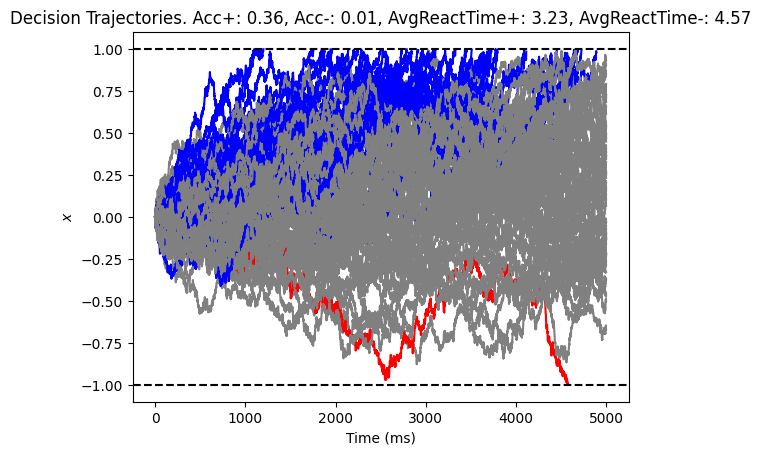

In [ ]:
N = 100
# avoid divide by zero error
poscount = 0.00001
negcount = 0.00001
reactp = 0
reactn = 0

plt.figure()
for i in range(N):
    res, dec, traj = ddm_trial(0.1)
    if res == 1:
        plt.plot(traj, color="blue")
        poscount += 1
        reactp += dec
    elif res == -1:
        plt.plot(traj, color="red")
        negcount += 1
        reactn += dec
    else:
      plt.plot(traj, color="gray")
plt.axhline(1, color="k", ls="--", lw=1.5, zorder=15)
plt.axhline(-1, color="k", ls="--", lw=1.5, zorder=15)
plt.xlabel("Time (ms)")
plt.ylabel("$x$")



plt.title(f"Decision Trajectories. Acc+: {poscount/N:.2f}, Acc-: {negcount/N:.2f}, AvgReactTime+: {reactp/poscount:.2f}, AvgReactTime-: {reactn/negcount:.2f}")
plt.show()



